In [2]:
import pandas as pd

In [3]:
df_final = pd.read_csv('creditcard_reamostrado.csv')

df_final.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,157278.0,1.984787,-1.937036,0.486613,-1.245536,-2.518536,-0.544524,-1.819244,-0.074875,-0.659777,...,0.174011,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00,0
1,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
2,56424.0,0.319007,-1.072867,-0.216146,1.494709,-0.627063,-0.761867,0.941687,-0.430272,-0.267431,...,0.332521,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00,0
3,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
4,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


In [4]:
from sklearn.model_selection import train_test_split

# Divide os dados em características (X) e rótulos (y)
X = df_final.drop('Class', axis=1)
y = df_final['Class']

# Divide os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Exibe o tamanho dos conjuntos
print(f"Tamanho do conjunto de treinamento: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treinamento: 688 amostras
Tamanho do conjunto de teste: 296 amostras


Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.93       148
           1       0.96      0.90      0.93       148

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296

ROC AUC: 0.9764426588750913


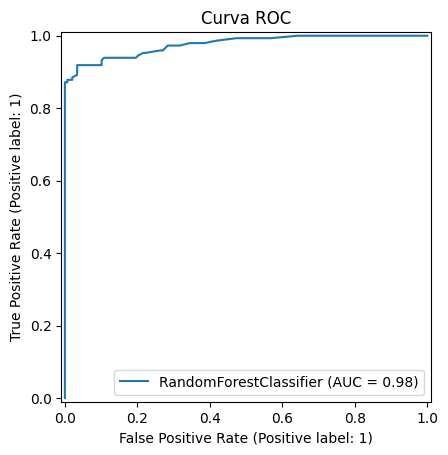

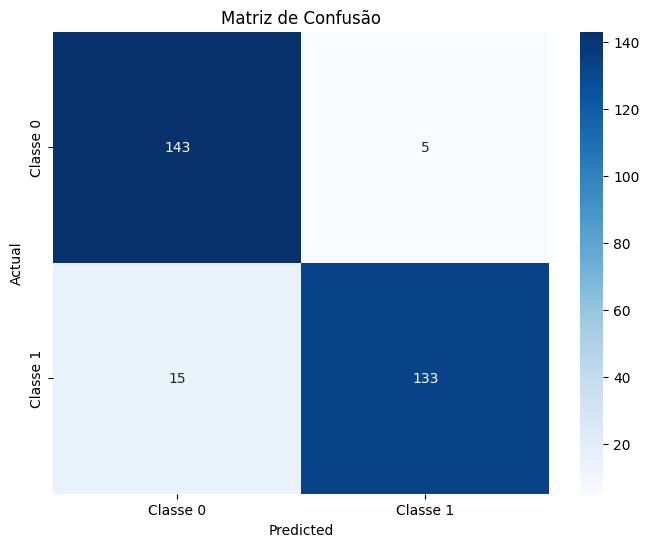

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Treina o modelo
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Previsões
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Avaliação
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Curva ROC
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.title("Curva ROC")
plt.show()

# Plot da matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Classe 0', 'Classe 1'], yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

In [9]:
# cross valdiation

# Árvores de Decisão (Classificação):

- Fáceis de construir, usar e interpretar MAS
- Na prática não são tão precisas para classificar novas amostras (fácil de overfittar)
- São ótimas para classificar coisas visualmente no dia a dia
- Gini Impurity (grau de impureza das folhas) usado para determinar quais features aparecem na raiz e nós subsequentes 
- Quanto menor o grau de impureza, mais correta é a previsão da árvore
- A busca por um menor grau de impureza pode colaborar para o overfitting por contruirmos árvores pouco genéricas e muito ajustadas aos dados de treinamento
- Há também o problema de que poucas amostras podem chegar às folhas de uma longa árvores o que piora o overfitting por não haver dado suficiente percorrendo tudo

# Random Forest (Classificação):

- Combina o poder das árvores de decisão com uma pitada de aleatoriedade para melhorar a generalização
- Criar o bootstrapped dataset (dataset paralelo de mesmo tamanho com amostras aleatórias do original podendo haver repetição de amostras)
- Cria diferentes árvores de decisão com diferentes colunas (features/variables) a cada passo
- Em vez de selecionar todas as features para se candidatarem ao nó raiz, seleciona algumas aleatoriamente
- Nessas features escolhidas aleatoriamente, escolhe-se para a raiz aquela de menor impureza (mantém a lógica de impureza das árvores em algum nível pois ela é sim benéfica em certa medida)
- Para terminar a árvore, escolhe as outras features que não foram na raiz para os ramos 
- Ou seja, cada árvore da floresta aleatória é um subconjunto de features aleatórias a cada passo
- Agora, basta criar outro bootstrapped datased e repetir para gerar várias árvores
- Idealmente, deve-se gerar 100 árvores
- Todas as árvores são executada e seus resultados combinados em uma votação, o resultado mais votado é o escolhido
- Bootstrapping + Votation = BAGGING
- Os dados que não forem escolhidos em um bootstrapped dataset são chamados Out-Of-Bag e são utilizados para validar a árvore criada
- Out-Of-Bag Error: usado para medir a acurácia da Random Forest